### Figure for showing the diffusion mechanism

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '24',
         'axes.titlesize':'24',
         'xtick.labelsize':'24',
         'ytick.labelsize':'24'}
pylab.rcParams.update(params)

from matplotlib.ticker import AutoMinorLocator


In [3]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
data_dir = '/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/reviews_responses/'

ds = xr.open_dataset(data_dir+'sal_IB_vertical_anom.nc')


In [5]:
ds

<xarray.Dataset>
Dimensions:  (Z: 50, time: 310)
Coordinates:
  * Z        (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * time     (time) datetime64[ns] 1992-02-15T12:00:00 ... 2017-11-16
    PHrefC   (Z) float32 ...
    drF      (Z) float32 ...
    month    (time) int64 ...
Data variables:
    SALT     (time, Z) float32 ...

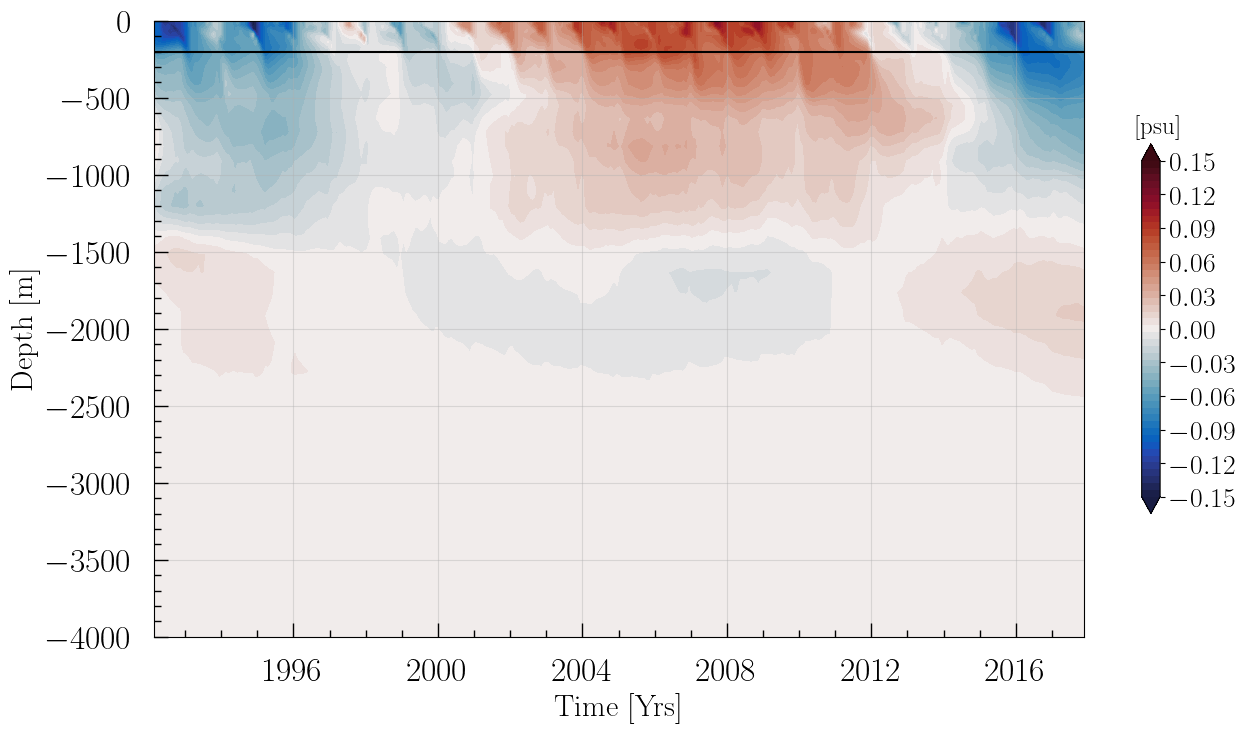

In [8]:
fig, ax = plt.subplots(figsize=(15,8))

co = ax.contourf(ds.time, ds.Z, ds.SALT.transpose(),  levels = np.linspace(-0.15,0.15,50), extend='both', cmap=cmocean.cm.balance)
# Put a custom label on the y axis
ax.set_xlabel(r"Time [Yrs]", fontsize=22)
ax.set_ylabel(r"Depth [m]", fontsize=22)


ax.grid(True, alpha=0.4)
ax.tick_params(which='both',
               labelcolor='k', 
               labelsize=24, 
               direction='in',
               width=1,
               length=10,
               pad=15)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', direction='in', length=5, width=1, color='k')

ax.axhline(y=-200, c='k')
ax.set_ylim(0,-4000)
ax.invert_yaxis()

plt.figtext(0.78,0.74, r'[psu]', fontsize=18)
# plt.figtext(0.16,0.13, r'\textbf{F$_1$}', fontsize=18)
# plt.figtext(0.65,0.13, r'\textbf{F$_2$}', fontsize=18)

# axs[0].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
# axs[0].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
# axs[0].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)

# axs[1].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
# axs[1].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
# axs[1].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)

# axs[2].axvspan(xmin='1992-01',xmax='1995-01',color='blue',alpha=0.1)
# axs[2].axvspan(xmin='2000-01',xmax='2004-01',color='orange',alpha=0.1)
# axs[2].axvspan(xmin='2011-12',xmax='2017-12',color='blue',alpha=0.1)

cbar=fig.colorbar(co, orientation='vertical', shrink=0.6, aspect=20, ticks=np.linspace(-0.15,0.15,11), pad=0.05)
cbar.ax.tick_params(labelsize=20)


plt.savefig('figs/review_response_Diffusion.pdf', format='pdf', bbox_inches='tight', facecolor='white', dpi=400)
